# Portfolio simulation
#### using Hull White model

https://python.plainenglish.io/the-hull-white-model-e40512a9b40b

In [2]:
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
sigma = 0.1
a = 0.1

timestep = 360
length = 30 # in years

forward_rate = 0.05
day_count = ql.Thirty360(ql.Thirty360.BondBasis)

In [6]:
todays_date = ql.Date(15, 1, 2015)

In [15]:

ql.Settings.instance().evaluationDate = todays_date
spot_curve = ql.FlatForward(todays_date, ql.QuoteHandle(ql.SimpleQuote(forward_rate)), day_count)
spot_curve_handle = ql.YieldTermStructureHandle(spot_curve)
hw_process = ql.HullWhiteProcess(spot_curve_handle, a, sigma)
rng = ql.GaussianRandomSequenceGenerator(ql.UniformRandomSequenceGenerator(timestep, ql.UniformRandomGenerator()))
seq = ql.GaussianPathGenerator(hw_process, length, timestep, rng, False)


In [16]:
def generate_paths(num_paths, timestep):
    arr = np.zeros((num_paths, timestep+1))
    for i in range(num_paths):
        sample_path = seq.next()
        path = sample_path.value()
        time = [path.time(j) for j in range(len(path))]
        value = [path[j] for j in range(len(path))]
        arr[i, :] = np.array(value)
    return np.array(time), arr

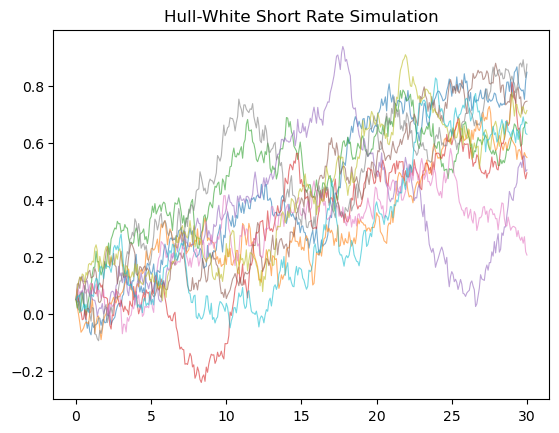

In [23]:
num_paths = 10
time, paths = generate_paths(num_paths, timestep)
for i in range(num_paths):
    plt.plot(time, paths[i, :], lw=0.8, alpha=0.6)
plt.title("Hull-White Short Rate Simulation")
plt.show()





